# All About Vancouver Street Trees 

UBC EXL - Data Visualization - Final Project <br>
Sabrina Knaudt <br>
May 12th

## Introduction

Vancouver is situated in the Pacific Northwest, a region known for its temperate climate and high levels of precipitation [[1]](https://www.thecanadianencyclopedia.ca/en/article/northwest-coast). These environmental conditions contribute to the development of lush vegetation and support the growth of diverse and sizeable flora. As a result, the city is home to a rich variety of street trees, which not only add an aesthetic appeal but also play a crucial role in urban life, air quality, and public well-being.
<br><br>
In this project, I have chosen to explore the Vancouver Street Trees dataset [[2]](https://opendata.vancouver.ca/explore/dataset/public-trees/information/?disjunctive.neighbourhood_name&disjunctive.on_street&disjunctive.species_name&disjunctive.common_name) in order to gain a deeper understanding of the city’s street trees. Specifically, I aim to analyze them in terms of genus, size, the neighbourhoods in which they are found, and the years in which they were planted. By examining these factors, I hope to paint a comprehensive picture of the composition and distribution of Vancouver's street trees.
<br><br>
Through this analysis, I will address the following questions:

- What are the most common types of trees found along Vancouver's streets, and how large do they tend to be?
- Which genus of trees dominates in terms of size, and in which neighbourhoods are these trees most frequently found?
- Conversely, which genus contains the smallest trees, and where are they found?
- Does the date a tree is planted contribute to its size?

## Analysis

In [18]:
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Read in the Data

In [19]:
# Import important libraries
import altair as alt
import pandas as pd

# Read in data
trees_url = "https://raw.githubusercontent.com/UBC-MDS/data_viz_wrangled/main/data/Trees_data_sets/small_unique_vancouver.csv"
trees_df = pd.read_csv(trees_url)
trees_df

,Unnamed: 0,std_street,on_street,species_name,neighbourhood_name,date_planted,diameter,street_side_name,genus_name,assigned,...,plant_area,curb,tree_id,common_name,height_range_id,on_street_block,cultivar_name,root_barrier,latitude,longitude
0,10747,W 20TH AV,W 20TH AV,PLATANOIDES,Riley Park,2000-02-23,28.5,EVEN,ACER,N,...,15,Y,21421,NORWAY MAPLE,4,0,NaN,N,49.252711,-123.106323
1,12573,W 18TH AV,W 18TH AV,CALLERYANA,Arbutus-Ridge,1992-02-04,6.0,ODD,PYRUS,N,...,7,Y,129645,CHANTICLEER PEAR,2,2300,CHANTICLEER,N,49.256350,-123.158709
2,29676,ROSS ST,ROSS ST,NIGRA,Sunset,NaN,12.0,ODD,PINUS,N,...,7,Y,154675,AUSTRIAN PINE,4,7800,NaN,N,49.213486,-123.083254
3,8856,DOMAN ST,DOMAN ST,AMERICANA,Killarney,1999-11-12,11.0,EVEN,FRAXINUS,N,...,7,Y,180803,AUTUMN APPLAUSE ASH,4,6900,AUTUMN APPLAUSE,N,49.220839,-123.036721
4,21098,EAST BOULEVARD,EAST BOULEVARD,HIPPOCASTANUM,Shaughnessy,NaN,15.5,ODD,AESCULUS,Y,...,N,Y,74364,COMMON HORSECHESTNUT,4,5200,NaN,N,49.238514,-123.154958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6132,E 53RD AV,E 53RD AV,SERRULATA,Victoria-Fraserview,NaN,17.0,EVEN,PRUNUS,N,...,9,Y,47059,KWANZAN FLOWERING CHERRY,2,2200,KWANZAN,N,49.221161,-123.061023
4996,5642,E 32ND AV,E 32ND AV,XX,Kensington-Cedar Cottage,2014-01-14,3.0,EVEN,CORNUS,N,...,10,N,247874,EDDIES WHITE WONDER DOGWOOD,1,1700,EDDIE'S WHITE WONDER,N,49.241544,-123.070644
4997,8777,DAWSON ST,DAWSON ST,TULIPIFERA,Killarney,2002-04-15,3.5,EVEN,LIRIODENDRON,N,...,7,Y,192642,ARNOLD TULIPTREE,2,6500,ARNOLD,N,49.224511,-123.048723
4998,23489,E 13TH AV,E 13TH AV,INVOLUCRATA,Mount Pleasant,2003-12-02,5.5,EVEN,DAVIDIA,N,...,5,Y,202500,DOVE OR HANDKERCHIEF TREE,1,300,NaN,Y,49.259208,-123.096905


In [20]:
# Get info about the dataset
trees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   std_street          5000 non-null   object 
 2   on_street           5000 non-null   object 
 3   species_name        5000 non-null   object 
 4   neighbourhood_name  5000 non-null   object 
 5   date_planted        2363 non-null   object 
 6   diameter            5000 non-null   float64
 7   street_side_name    5000 non-null   object 
 8   genus_name          5000 non-null   object 
 9   assigned            5000 non-null   object 
 10  civic_number        5000 non-null   int64  
 11  plant_area          4950 non-null   object 
 12  curb                5000 non-null   object 
 13  tree_id             5000 non-null   int64  
 14  common_name         5000 non-null   object 
 15  height_range_id     5000 non-null   int64  
 16  on_str

In [21]:
# Check data types
print(trees_df.dtypes, '\n')

Unnamed: 0              int64
std_street             object
on_street              object
species_name           object
neighbourhood_name     object
date_planted           object
diameter              float64
street_side_name       object
genus_name             object
assigned               object
civic_number            int64
plant_area             object
curb                   object
tree_id                 int64
common_name            object
height_range_id         int64
on_street_block         int64
cultivar_name          object
root_barrier           object
latitude              float64
longitude             float64
dtype: object 



Our data is obtained from the City of Vancouver Open Data portal under the Open Government Licence [[3]](https://opendata.vancouver.ca/pages/licence/). This data contains 5000 entries and 21 columns describing various details about Vancouver street trees. This includes various attributes such as genus, species, common name, planting location (as a street string and numeric coordinates), and physical characteristics. Most of the data is stored in string (object) or numeric (int/float) types. Very few columns have null values, but  date_planted and cultivar_name have half their entries as null values. We will need to pay attention to this as the date_planted column is important for our analysis. Additionally, we need to change the data type of this column to a datetime data type. 

Columns of interest:
- species_name: Name of the tree species. Can be used to expand our understanding of genus.

- neighbourhood_name: Indicates the neighbourhood each tree is located. This will be necessary to assess spatial trends. <br>

- date_planted: Records the date each tree was planted in year-month-day format. This column will be important for analyzing the relationship between the age of a tree and its size <br>

- diameter: Numerical variable measuring tree diameter in inches. Will serve as one of our key indicators of tree size. <br>

- genus_name: This column identifies the genus of each tree, providing a broader classification than species. It will serve as the primary grouping variable in our analysis. This will allow us to evaluate which genera are most common, tend to grow the largest or smallest trees, and how these patterns vary across neighbourhoods. <br>

- height_range_id: A variable representing the approximate height of each tree, grouped in 10-foot increments (e.g., 0 = 0–10 feet, 1 = 10–20 feet, 2 = 20–30 feet, etc.). While less precise than diameter, this measure gives us a general sense of tree stature and will be another indicator of tree size. 

In [22]:
# Change the necessary data types
trees_df["date_planted"] = pd.to_datetime(trees_df["date_planted"], format="%Y-%m-%d")

In [23]:
# Clean the data for our purposes

# My columns of interest
my_cols = [
    "species_name",
    "neighbourhood_name",
    "date_planted",
    "diameter",
    "genus_name",
    "height_range_id",
]

trees_clean = trees_df.copy()
trees_clean = trees_clean[my_cols]
trees_clean

,species_name,neighbourhood_name,date_planted,diameter,genus_name,height_range_id
0,PLATANOIDES,Riley Park,2000-02-23,28.5,ACER,4
1,CALLERYANA,Arbutus-Ridge,1992-02-04,6.0,PYRUS,2
2,NIGRA,Sunset,NaT,12.0,PINUS,4
3,AMERICANA,Killarney,1999-11-12,11.0,FRAXINUS,4
4,HIPPOCASTANUM,Shaughnessy,NaT,15.5,AESCULUS,4
...,...,...,...,...,...,...
4995,SERRULATA,Victoria-Fraserview,NaT,17.0,PRUNUS,2
4996,XX,Kensington-Cedar Cottage,2014-01-14,3.0,CORNUS,1
4997,TULIPIFERA,Killarney,2002-04-15,3.5,LIRIODENDRON,2
4998,INVOLUCRATA,Mount Pleasant,2003-12-02,5.5,DAVIDIA,1


### Plot 1: Height and Diameter Among the Most Ubiquitous Trees in Vancouver

In [24]:
# Make a df to count the number of genera in the dataset and their respective value counts
my_rename = {"index": "genus", "genus_name": "counts"}

df1 = trees_clean["genus_name"].value_counts().reset_index()
df1.rename(columns=my_rename, inplace=True)
df1

,genus,counts
0,ACER,1218
1,PRUNUS,1050
2,FRAXINUS,238
3,TILIA,238
4,QUERCUS,218
...,...,...
62,ARAUCARIA,1
63,CLADRASTIS,1
64,CHITALPA,1
65,SEQUOIA,1


In [25]:
# Get the top 10
df2 = df1.loc[df1["counts"] > 100]
df2

,genus,counts
0,ACER,1218
1,PRUNUS,1050
2,FRAXINUS,238
3,TILIA,238
4,QUERCUS,218
5,CARPINUS,188
6,FAGUS,174
7,MALUS,151
8,MAGNOLIA,139
9,CRATAEGUS,134


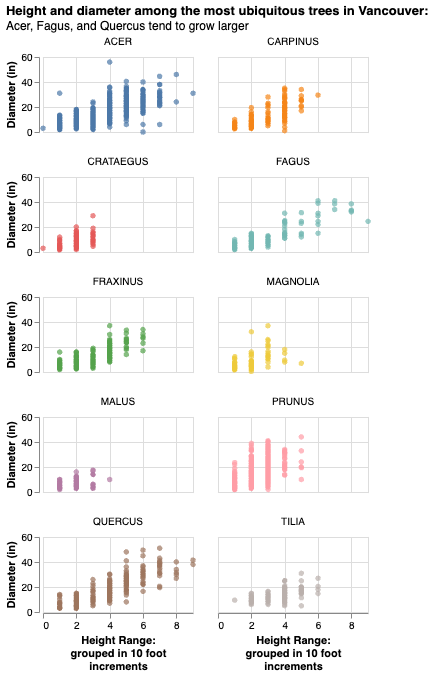

In [26]:
# Height and diameter faceted by genus, if n > 100

# Plot sort
my_sort = df2["genus"].to_list()

# Make the df for this plot
plot1_df = trees_clean.copy()
plot1_df = plot1_df[plot1_df["genus_name"].isin(my_sort)]

# Plot title
plot1_title = alt.TitleParams(
    "Height and diameter among the most ubiquitous trees in Vancouver: ",
    subtitle='Acer, Fagus, and Quercus tend to grow larger',
    align='left',
    anchor='start'
)

# Plot
plot1 = alt.Chart(plot1_df).mark_circle().encode(
        alt.Y("diameter", title="Diameter (in)"),
        alt.X("height_range_id",
              title=["Height Range: ", "grouped in 10 foot", "increments"]
             ),
        alt.Color("genus_name", legend=None, title=None),
        tooltip=[
            alt.Tooltip("species_name", title="Species:"),
            alt.Tooltip("date_planted", title="Date planted")
        ]
).properties(height=75, width=150).facet(alt.Facet("genus_name:N", title=None), columns=2)


plot1 = plot1.properties(title=plot1_title)
plot1

> Genera with trees that tend to grow larger will appear toward the top right of their respective graphs, indicating both greater height and diameter. Based on this pattern, Acer, Fagus, and Quercus stand out as genera with larger trees compared to the other common trees. However, this observation is limited to the more ubiquitous genera. It remains unclear which genus contains the overall largest trees in the city, and in which neighbourhoods they can be found. 

### Plot 2: Largest Trees by Neighbourhood

In [27]:
# Largest tree genera by diameter
grouped_genus = trees_clean.groupby(by="genus_name")["diameter"].describe()
diameter_genus_top10 = grouped_genus.sort_values("mean", ascending=False).head(10)
diameter_genus_top10

,count,mean,std,min,25%,50%,75%,max
genus_name,,,,,,,,
SEQUOIA,1.0,29.500000,NaN,29.5,29.500,29.50,29.500,29.5
POPULUS,4.0,26.875000,14.585238,11.0,16.250,28.25,38.875,40.0
AESCULUS,74.0,25.469595,7.868564,3.0,22.125,26.00,30.000,44.0
CATALPA,24.0,24.666667,11.218595,3.0,21.750,25.50,31.250,46.0
ULMUS,100.0,23.668500,9.517490,3.0,21.875,24.40,29.625,40.5
TSUGA,6.0,23.583333,9.861119,8.0,18.875,25.00,30.750,34.0
CEDRUS,14.0,22.821429,19.306841,3.0,11.250,19.00,24.375,71.0
JUGLANS,7.0,22.821429,8.689930,11.0,16.625,25.00,27.500,35.5
PSEUDOTSUGA,40.0,22.812500,9.164233,6.0,13.875,24.00,30.000,40.0


In [28]:
# Largest tree genera by height_range_id
grouped_genus2 = trees_clean.groupby(by="genus_name")["height_range_id"].describe()
height_genus_top10 = grouped_genus2.sort_values("mean", ascending=False).head(10)
height_genus_top10

,count,mean,std,min,25%,50%,75%,max
genus_name,,,,,,,,
POPULUS,4.0,6.250000,1.258306,5.0,5.75,6.0,6.50,8.0
ULMUS,100.0,5.330000,1.959463,1.0,5.00,6.0,7.00,9.0
PTELEA,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
ALNUS,2.0,5.000000,0.000000,5.0,5.00,5.0,5.00,5.0
AESCULUS,74.0,4.905405,1.218228,1.0,4.00,5.0,6.00,7.0
PLATANUS,60.0,4.866667,1.741485,1.0,4.00,4.0,6.25,8.0
PSEUDOTSUGA,40.0,4.775000,1.510434,2.0,4.00,4.0,5.25,9.0
CATALPA,24.0,4.708333,1.601064,1.0,4.00,5.0,6.00,7.0
JUGLANS,7.0,4.428571,1.718249,2.0,3.50,4.0,5.50,7.0


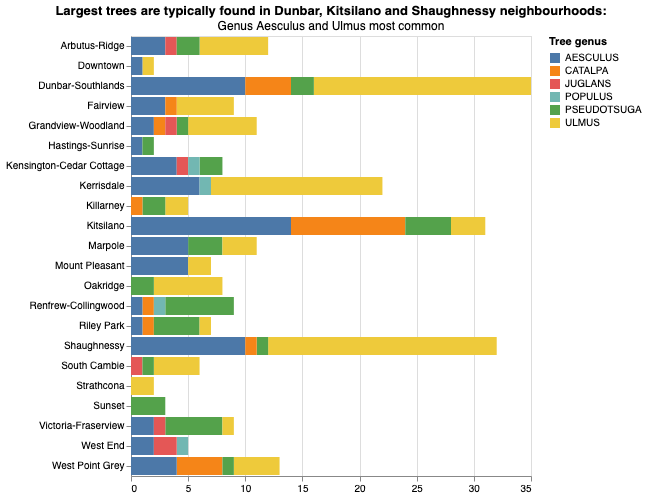

In [29]:
# Keep genus if it is in both top ten
in_both_top10 = set(diameter_genus_top10.index) & set(height_genus_top10.index)

# Create a big trees dataframe
big_trees = list(in_both_top10)
big_trees_df = trees_clean.copy()
big_trees_df = big_trees_df[big_trees_df["genus_name"].isin(big_trees)]

# Plot title
plot2_title = alt.TitleParams(
    "Largest trees are typically found in Dunbar, Kitsilano and Shaughnessy neighbourhoods: ",
    subtitle="Genus Aesculus and Ulmus most common",
)

# Plot big trees by neighbourhood
plot2 = alt.Chart(big_trees_df).mark_bar().encode(
        alt.X('count():Q', title=None), # Needs a title? or mark_text?
        alt.Y("neighbourhood_name", title=None),
        alt.Color("genus_name", title="Tree genus"),
).properties(title=plot2_title)

plot2


> Interesting! None of the common genera made it to our large tree plot. Likely, their large ranges generate middling means. 

> Now, back to our current plot. Genus Aesculus (chestnut trees [[4]](https://en.wikipedia.org/wiki/Aesculus)) and Ulmus (elm trees [[5]](https://en.wikipedia.org/wiki/Elm)) are the most common sizeable trees in Vancouver. They can be typically found in the Dunbar, Kits, and Shaughnessy neighbourhoods. Not surprising, Downtown Vancouver is sorely lacking sizeable trees. However, this deficit is also present in Hastings-Sunrise, Strathcona, and Sunset neighbourhoods.

> I wonder if the distribution of smallest trees will look like this or if there are different neighbourhood patterns with a change in size? 

### Plot 3: Small Trees by Neighbourhood

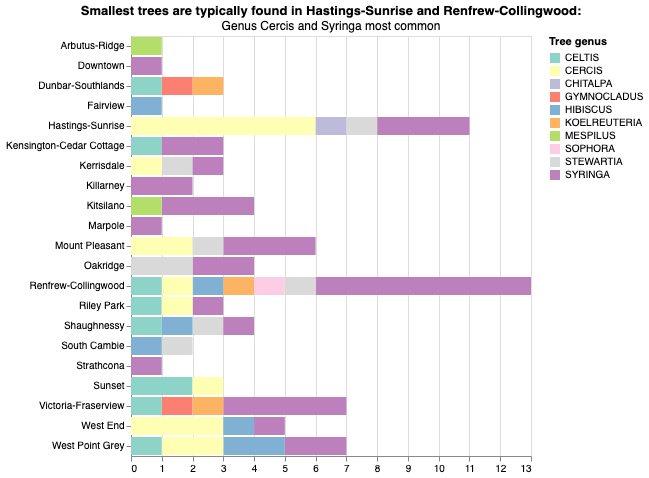

In [30]:
# Smallest tree genera by diameter
diameter_genus_low10 = grouped_genus.sort_values('mean', ascending=True).head(10)

# Smallest tree genera by height_range_id
height_genus_low10 = grouped_genus.sort_values('mean', ascending=True).head(10)

# Keep genus if in both top ten 
in_both_small = set(diameter_genus_low10.index) & set(height_genus_low10.index)

# Create small trees dataframe
small_trees_df = trees_clean.copy()
small_trees_df = small_trees_df[small_trees_df['genus_name'].isin(in_both_small)]

# Plot title
plot3_title = alt.TitleParams(
    "Smallest trees are typically found in Hastings-Sunrise and Renfrew-Collingwood: ",
    subtitle="Genus Cercis and Syringa most common",
)

# Plot small trees by neighbourhood
plot3 = alt.Chart(small_trees_df).mark_bar().encode(
        alt.X('count():Q', title=None), # Needs a title? or mark_text?
        alt.Y("neighbourhood_name", title=None),
        alt.Color("genus_name", title="Tree genus", scale=alt.Scale(scheme='set3')),
).properties(title=plot3_title)

plot3

> Hastings-Sunrise lacks in sizeable trees but also hosts a large amount of small trees! Interestly, other neighbourhoods at the lower end of the large tree plot are now in the higher end of the small tree plot, namely Renfrew-Collingwood and Victoria-Fraserview.  

> Genus Cercis (redbuds [[6]](https://en.wikipedia.org/wiki/Cercis)) and Syringa (lilacs [[7]](https://en.wikipedia.org/wiki/Syringa)) are the most common small trees in Vancouver. This makes sense as  both genera are of small trees or shrubs. 

> This begs the question: is tree size only associated with genus or is tree size also a product of when it was planted?



### Plot 4: Small / Large Tree Date Planted Rug Plot

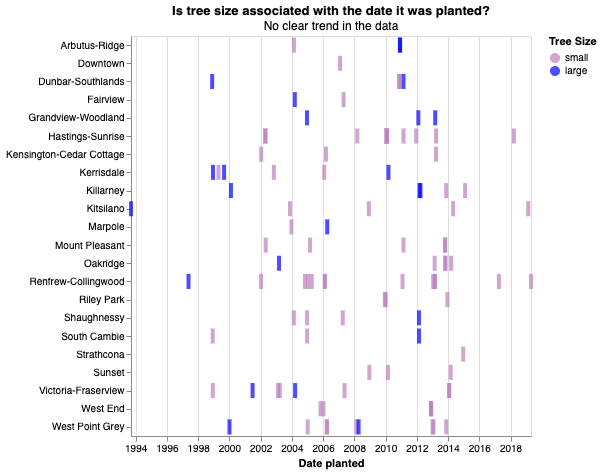

In [31]:
# Small / large encoded as color for a rug plot to visualize and compare date_planted

# Add size label for color encoding
small_trees_df['size'] = 'small'
big_trees_df['size'] = 'large'

# Make the plot df, vertical concatination 
small_big_df = pd.concat([small_trees_df, big_trees_df], axis=0)

# Plot title
plot4_title = alt.TitleParams(
    "Is tree size associated with the date it was planted?",
    subtitle='No clear trend in the data'
)

# Plot 
plot4 = alt.Chart(small_big_df).mark_tick(thickness=4).encode(
    alt.X('date_planted', title='Date planted'),
    alt.Y('neighbourhood_name', title=None),
    alt.Color('size:N', 
              scale=alt.Scale(
                  domain=['small', 'large'], 
                  range=['#bc80bd', 'blue']
              ),
              legend=alt.Legend(title='Tree Size')
             ),
    tooltip=[
        alt.Tooltip('genus_name', title='Genus: '),
        alt.Tooltip('height_range_id', title='Height range: '),
        alt.Tooltip('diameter', title='Diameter (in): ')
    ]
).properties(height=400, width=400, title=plot4_title)


plot4

# Tableau10 yellow: #e7ca60; large
# Set3 purple: #bc80bd; small

> The most recently planted trees appear to be ‘small’ trees up until 2013 and the three oldest trees (that we have data for) are ‘large’ trees. Yet there appear to be no real trend for size and date planted.


> However, this plot relied on our categorical classification of size and does not actually reflect true tree size. There must be an efficient way to check all this…


## Dashboard

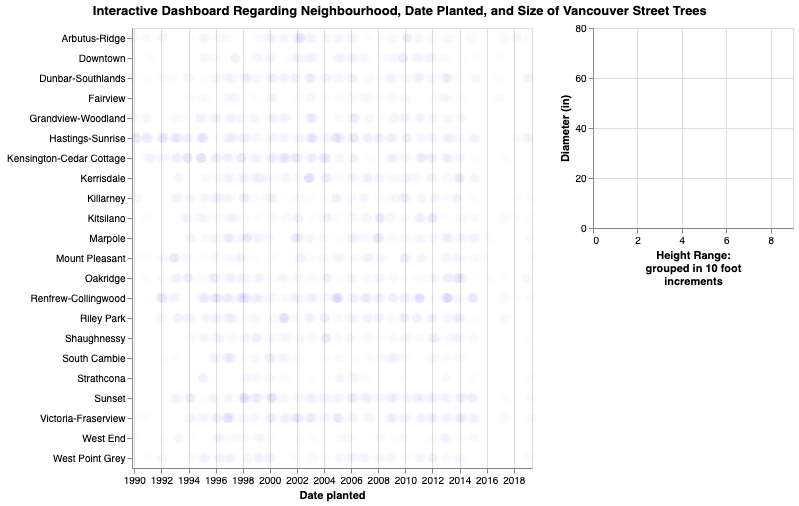

In [32]:
# Tree size plot base
size_plot = alt.Chart(trees_clean).mark_circle().encode(
    alt.X('height_range_id', title=["Height Range: ", "grouped in 10 foot", "increments"]),
    alt.Y('diameter', title='Diameter (in)')
).properties(height=200, width=200)

# Date planted base plot
date_planted_plot = alt.Chart(trees_clean).mark_circle(size=50).encode(
    alt.X('date_planted', title='Date planted'),
    alt.Y('neighbourhood_name', title=None)
)

# Add height_range_id slider
height_slider = alt.binding_range(name="Height range: ", min=0, max=9, step=1)

select_height = alt.selection_single(fields=["height_range_id"], bind=height_slider)

date_planted_plot = date_planted_plot.encode(
    opacity=alt.condition(
        alt.datum.height_range_id <= select_height.height_range_id,
        alt.value(0.9),
        alt.value(0.01),
    )
).add_selection(select_height)

# Add size and color genus drop down selection
genus = df1['genus'].to_list()
genus_dropdown = alt.binding_select(name='Genus: ', options=genus)
select_genus = alt.selection_single(fields=['genus_name'], bind=genus_dropdown)

date_planted_plot = date_planted_plot.encode(
    color=alt.condition(
        select_genus,
        alt.value('blue'),
        alt.value('green')
    ),
    size=alt.condition(
        select_genus,
        alt.value(100),
        alt.value(25)
    ),
).add_selection(select_genus)

# Add widgets to size plot
size_plot = size_plot.encode(
    size=alt.condition(
        select_genus,
        alt.value(75),
        alt.value(25)
    ),
    color=alt.condition(
        select_genus,
        alt.value('blue'),
        alt.value('green')
    ),
    opacity=alt.condition(
        alt.datum.height_range_id <= select_height.height_range_id,
        alt.value(0.9),
        alt.value(0)
    ),
    tooltip=[
        alt.Tooltip('neighbourhood_name', title='Neighbourhood: '),
        alt.Tooltip('diameter', title='Diameter (in): '),
        alt.Tooltip('height_range_id', title='Height range: ')
        
    ]
)

# Interactive component
interact = alt.selection_interval()
date_planted_plot = date_planted_plot.add_selection(interact)
size_plot = size_plot.transform_filter(interact)

# Dashboard title
dash_title = alt.TitleParams(
    'Interactive Dashboard Regarding Neighbourhood, Date Planted, and Size of Vancouver Street Trees',
    anchor='middle',
    align='center'
)

dashboard = (date_planted_plot | size_plot.interactive()).properties(title=dash_title)
dashboard

> This dashboard allows you to individually select a tree genus with a dropdown menu and toggle the height range with a slider. The dropdown is responsible for setting the size and color of the points on both graphs. The larger point colored blue is what you are selecting for. The remaining smaller green points are there to visualize the rest of the distribution. The height range slider selects the height range up to and including the number you have selected, filtering the data on both graphs. You may also brush the date planted plot to highlight specific data points. This interval will show up on the size plot (on the right).  Lastly, the size plot is interactive allowing you to zoom and pan to reach specific data points. 

## Discussion

This analysis of the Vancouver Street Trees dataset reveals several key insights about the composition and spatial distribution of the city’s street trees.
<br><br>
First, tree size appears to vary systematically by genus. Genera such as Aesculus (chestnuts) and Ulmus (elms) stand out as the most common sizeable trees in Vancouver and are frequently found in neighbourhoods like Dunbar, Kitsilano, and Shaughnessy. Perhaps these areas have had larger tree species intentionally planted due to their residential character and space availability. In contrast, neighbourhoods such as Downtown, Hastings-Sunrise, Strathcona, and Sunset are lacking in sizeable trees. This could suggest either limited space, younger tree populations, or different planting strategies.
<br><br>
Smaller genera, such as Cercis (redbuds) and Syringa (lilacs) are concentrated in areas like Hastings-Sunrise, Victoria-Fraserview, and Renfrew-Collingwood. This potential inverse spatial pattern between large and small trees across these neighbourgoods could point to a possible relationship between neighbourhood characteristics and tree planting strategies. Perhaps density, land use, and available greenspace vastly varies in these neighbourhoods.
<br><br>
When examining tree size and planting year, there appears to be no clear trend. These observations were limited by the nature of their categorical classification and constrained by the incomplete data in the date_planted column.
<br><br>
This analysis both confirmed and challenged my initial expectations. I anticipated that some genera would dominate in terms of size and frequency. I also expected wealthier and more spacious neighbourhoods to have larger trees. However, I did not expect such a clear inverse  spatial pattern in terms of small/large tree presence in neighbourhoods. Nor did I anticipate that not a single common genera would appear in the largest size category, which is likely a result of their broad distribution and averaging effects.
<br><br>
Further, a limitation of this analysis was the lack of complete data for the planting date column, which may have affected the accuracy of conclusions about tree age and size. Moreover, using the height_range_id as a proxy for true height may have introduced some imprecision, especially when working with genera that span multiple height categories.
<br><br>
Finally, this analysis opens up several other questions for further exploration. For example:
- How does the presence of certain types of trees correlate with different urban (density, land use) and socio-economic indicators of neighbourhoods?
- Are some species or genera being prioritized in recent planting efforts? If so, why? And does this depend on neighbourhood?

## References

1. https://www.thecanadianencyclopedia.ca/en/article/northwest-coast

2. https://opendata.vancouver.ca/explore/dataset/public-trees/information/?disjunctive.neighbourhood_name&disjunctive.on_street&disjunctive.species_name&disjunctive.common_name

3. https://opendata.vancouver.ca/pages/licence/

4. https://en.wikipedia.org/wiki/Aesculus

5. https://en.wikipedia.org/wiki/Elm

6. https://en.wikipedia.org/wiki/Cercis

7. https://en.wikipedia.org/wiki/Syringa




## Additional Attributions 

- UBC Extended Learning - Key Capabilities for Data Science - Data Visualization Course: [Modules](https://viz-learn.mds.ubc.ca/en)
- Altair [Documentation](https://altair-viz.github.io/user_guide/data.html#user-guide-data)
- Pandas [Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)